In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# pandas and numpy: Libraries for data manipulation and numerical computations.
# train_test_split: Function to split the dataset into training and testing sets.
# StandardScaler: Tool to standardize the features for better KNN performance.
# KNeighborsClassifier: Implements the K-Nearest Neighbors classification algorithm.
# Evaluation Metrics: confusion_matrix, accuracy_score, precision_score, recall_score, and f1_score are used to evaluate the model.
# warnings: Suppresses warnings to keep the output clean.


In [15]:
# Load the dataset
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:

# Preprocessing the dataset
# Dropping the 'User ID' column as it is not necessary for classification
dataset = dataset.drop(columns=['User ID'])

# Convert 'Gender' column to numerical values (Male = 0, Female = 1)
dataset['Gender'] = dataset['Gender'].map({'Male': 0, 'Female': 1})

In [4]:

# Features and target variable
X = dataset[['Age', 'EstimatedSalary']]  # Features
y = dataset['Purchased']  # Target variable

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#Standardizes features to have a mean of 0 and standard deviation of 1, which helps improve KNN performance by giving each feature an equal weight.

In [6]:
scaler

StandardScaler()

In [7]:

# Implementing K-Nearest Neighbors Algorithm
classifier = KNeighborsClassifier(n_neighbors=5)  # You can change 'n_neighbors' as needed
# classifier = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
# classifier = KNeighborsClassifier(n_neighbors=5,metric='manhattan')


classifier.fit(X_train, y_train)
# KNeighborsClassifier: Initializes a KNN classifier with 5 neighbors (n_neighbors=5). You can adjust the n_neighbors parameter based on model performance.
# fit: Trains the model on X_train and y_train.

# Predicting the results on the test set .predict: Uses the trained model to make predictions on the test set (X_test). The predictions are stored in y_pred.
y_pred = classifier.predict(X_test)

In [8]:

# Confusion Matrix
# Creates a confusion matrix that compares the true labels (y_test) with the predicted labels (y_pred).
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[48  4]
 [ 3 25]]


In [9]:
print(cm[0][0],cm[0][1])
print(cm[1][0],cm[1][1])

48 4
3 25


In [10]:
# TP | FN
# FP | TN
# TN (True Negative): Model predicted "No" and actual was "No".
# FP (False Positive): Model predicted "Yes" and actual was "No".
# FN (False Negative): Model predicted "No" and actual was "Yes".
# TP (True Positive): Model predicted "Yes" and actual was "Yes".
# accuracy_score: Proportion of correct predictions:  tp+tn /  tp+tn+fp+fn
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision score : Measures how many of the positive predictions were actually correct : tp / tp+fp
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# recall_score: Measures how well the model identifies positive cases:  tp / tp+fn
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# f1_score: Harmonic mean of Precision and Recall, giving a balanced measure of both metrics.   2 X P X R  /  P+R   
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

# Error Rate: Proportion of incorrect predictions,  (1 - Accuracy)     fp + fn / tp+tn+fp + fn
error_rate = 1 - accuracy
print(f"Error Rate: {error_rate:.4f}")


Accuracy: 0.9125
Precision: 0.8621
Recall: 0.8929
F1-Score: 0.8772
Error Rate: 0.0875


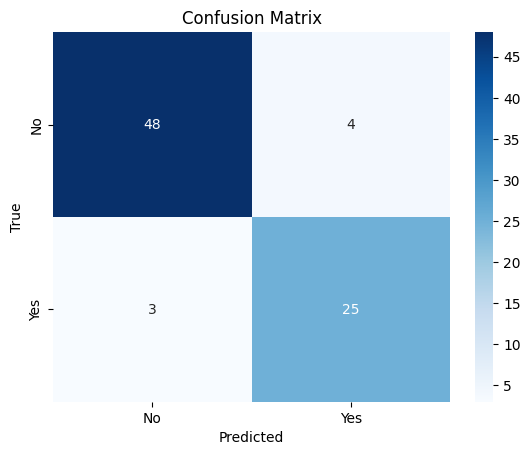

In [11]:

# Visualizing the confusion matrix using a heatmap
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# 1. What is K-Nearest Neighbors (KNN)?
# K-Nearest Neighbors is a supervised machine learning algorithm used for both classification and regression. It’s considered a "lazy learner" because it doesn’t make any assumptions about the underlying data distribution or learn a model during training. Instead, it memorizes the training dataset and makes predictions based on the similarity between data points.

# 2. How Does KNN Work?
# Here's a step-by-step explanation of how KNN classifies data:

# Training Phase: KNN doesn’t explicitly "train" a model; it stores all the training data points and their labels.

# Prediction Phase:

# When a new data point (or "test point") is presented for classification, KNN calculates the distance from this point to each of the points in the training set. The Euclidean distance is the most common choice, but other metrics like Manhattan distance can also be used.
# It identifies the k nearest neighbors (k most similar data points).
# It assigns the test point to the class with the majority vote among its k neighbors. For example, if most of the nearest neighbors belong to class A, KNN will classify the test point as A.
# The value of k is important. A small k (e.g., 1 or 3) can make the model sensitive to noise, while a large k (e.g., 20) can make it overly generalized. You can tune k to optimize performance for different datasets.

# 3. Why Use Feature Scaling?
# Because KNN relies on distance calculations, feature scaling (standardizing or normalizing) ensures that all features contribute equally. For example, if one feature ranges from 1 to 1000 while another ranges from 1 to 5, the larger feature could dominate the distance calculation and skew results. Standardization gives all features a mean of 0 and a standard deviation of 1.

# 4. Understanding the Confusion Matrix and Evaluation Metrics
# After classification, we evaluate the model’s performance using metrics like accuracy, precision, recall, F1-score, and error rate. The confusion matrix helps visualize these metrics by breaking down predictions into:

# True Positives (TP): Correct positive predictions.
# True Negatives (TN): Correct negative predictions.
# False Positives (FP): Incorrectly predicting positive (Type I error).
# False Negatives (FN): Incorrectly predicting negative (Type II error).
# From these, we can derive metrics:

# Accuracy: Overall correctness of the model. 
# (

# (TP+TN)/(TP+TN+FP+FN)
# Precision: Out of all positive predictions, how many were correct? 

# TP/(TP+FP)
# Recall: Out of all actual positives, how many were identified correctly? 

# TP/(TP+FN)
# F1-Score: Balance between precision and recall. 

# 2×(Precision×Recall)/(Precision+Recall)
# Error Rate: Proportion of incorrect predictions.
# 5. Real-World Applications of KNN
# KNN can be applied to several scenarios:

# Recommendation Systems: In recommendation engines (e.g., for movies, books), KNN finds users with similar preferences. For a user looking for book recommendations, KNN identifies books liked by users with similar reading histories.

# Medical Diagnosis: KNN can classify medical data to assist in diagnosing diseases. For instance, if a patient’s data (age, blood pressure, etc.) closely resembles those of patients with a known condition, KNN can help predict the likelihood of that condition.

# Image and Video Recognition: KNN can help recognize images and categorize them into groups based on visual similarity. This can be useful in facial recognition or grouping similar objects in a photo.

# Finance: In credit scoring or fraud detection, KNN compares a customer’s profile to similar profiles. If similar profiles have good credit scores or have committed fraud, this information can help in decision-making.

# Social Network Ads (like in your code): When you’re targeting social media ads, KNN can help classify users based on their profile (e.g., age, gender, income) to predict whether they might be interested in certain ads.

# 6. Example Walkthrough with the Social Network Ads Dataset
# Let’s relate the KNN steps to your Social Network Ads example:

# Data Loading and Preprocessing:

# Load the dataset, drop unnecessary columns, and convert categorical features like gender to numeric values.
# Define the features (age, estimated salary) and the target variable (whether the user purchased or not).
# Train-Test Split:

# Split data into training and testing sets to evaluate model performance on unseen data.
# Scaling:

# Standardize the features (age and estimated salary) so that both contribute equally to distance calculations.
# Training KNN:

# Set k = 5 to consider the 5 nearest data points and predict the likelihood of purchase based on similar users.
# Prediction and Evaluation:

# Use the model to predict on test data, generate the confusion matrix, and calculate evaluation metrics to understand the model’s accuracy and balance between precision and recall.
# Visualizing Results:

# A heatmap of the confusion matrix provides a clear picture of the model’s prediction performance, showing where it succeeded and where it misclassified.
# Key Takeaways
# KNN is simple but powerful and performs well in scenarios with clearly defined groups and small datasets.
# Scaling and choosing k are crucial to make KNN perform optimally.
# Real-world applications leverage KNN’s ability to find similarities, making it suitable for recommendation, classification, and detection tasks where similarity plays a role.